## importing Data and Libraries

In [1348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import statistics as stats
%matplotlib inline
sns.set()

In [1349]:
train = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')

In [1350]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [1351]:
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [1352]:
train.shape

(891, 11)

In [1353]:
test.shape

(418, 10)

In [1354]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 1500)

In [1355]:
women = train.loc[train.Sex == 'female']['Survived']
rate_of_women = sum(women)/len(women)

print('% of women who survived:', rate_of_women)

% of women who survived: 0.7420382165605095


In [1356]:
men = train.loc[train.Sex == 'male']['Survived']
rate_of_men = sum(men)/len(men)

print('% of men who survived: ', rate_of_men) 

% of men who survived:  0.18890814558058924


In [1357]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1358]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [1359]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [1360]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [1361]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [1362]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [1363]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [1364]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

## data analyze 

In [1365]:
three = train.loc[train.Pclass == 3]['Survived']
rate_three = sum(three)/len(three)
print('% of 3rd class who survived is:', rate_three)

% of 3rd class who survived is: 0.24236252545824846


In [1366]:
two = train.loc[train.Pclass == 2]['Survived']
rate_two = sum(two)/len(two)
print('% of 2nd class who survived is:', rate_two)

% of 2nd class who survived is: 0.47282608695652173


In [1367]:
one = train.loc[train.Pclass == 1]['Survived']
rate_one = sum(one)/len(one)
print('% of 1st class who survived is:', rate_one)

% of 1st class who survived is: 0.6296296296296297


## deleting the useless features

In [1368]:
train = train.drop(['Cabin', 'Ticket', 'Fare'], axis=1)

In [1369]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [1370]:
test = test.drop(['Cabin', 'Ticket', 'Fare'], axis=1)

In [1371]:
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,S


## cleaning data

In [1372]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [1373]:
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [1374]:
train.replace('NaN', np.nan, inplace=True)

In [1375]:
test.replace('NaN', np.nan, inplace=True)

In [1376]:
train.isna().head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False


In [1377]:
test.isna().head()

,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
892,False,False,False,False,False,False,False
893,False,False,False,False,False,False,False
894,False,False,False,False,False,False,False
895,False,False,False,False,False,False,False
896,False,False,False,False,False,False,False


In [1378]:
train['Age'] = train['Age'].astype(float)

In [1379]:
test['Age'] = test['Age'].astype(float)

In [1380]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [1381]:
test['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [1382]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [1383]:
test['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [1384]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1385]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [1386]:
alive = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]
print('Alive people percentage and Dead people percantage in order is:',float(len(alive)/len(train)*100),'&',float(len(dead)/len(train)*100))

Alive people percentage and Dead people percantage in order is: 38.38383838383838 & 61.61616161616161


## viasualize and underestanding the relations 

In [1387]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [1388]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [1389]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_11388\4054039262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train, palette=defualt_colors)


<Axes: xlabel='Pclass', ylabel='Survived'>

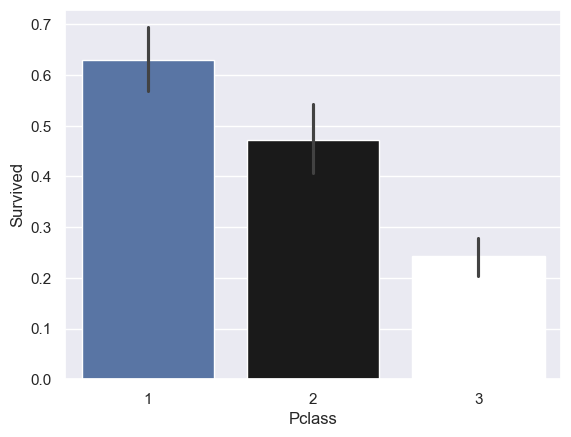

In [1390]:
defualt_colors = ['b','k','w']
sns.barplot(x='Pclass', y='Survived', data=train, palette=defualt_colors)

In [1391]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [1392]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [1393]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_11388\4081193892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train, palette=default_colors)


<Axes: xlabel='Sex', ylabel='Survived'>

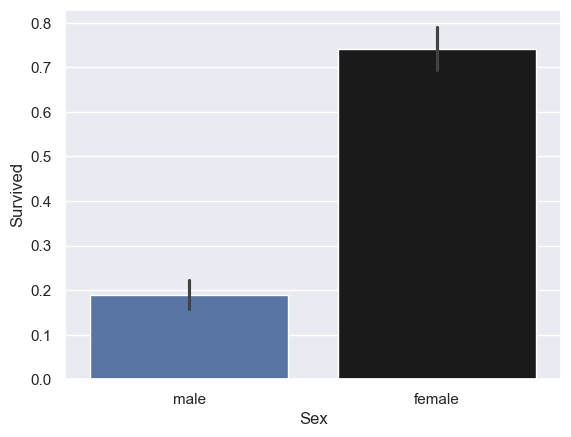

In [1394]:
default_colors = ['b','k']
sns.barplot(x='Sex', y='Survived', data=train, palette=default_colors)

In [1395]:
crosstab = pd.crosstab(train['Pclass'], train['Sex'])
print(crosstab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'population %')

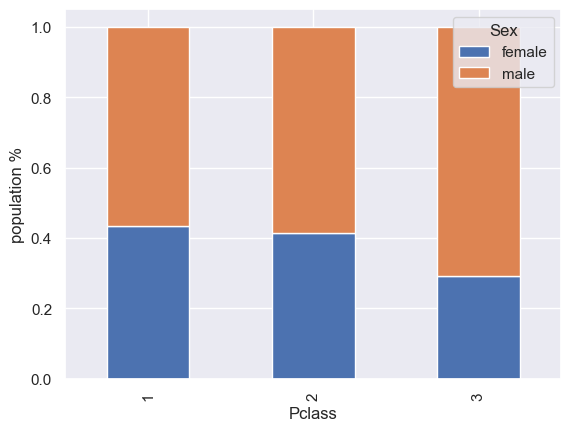

In [1396]:
crosstab.div(crosstab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.ylabel('population %')

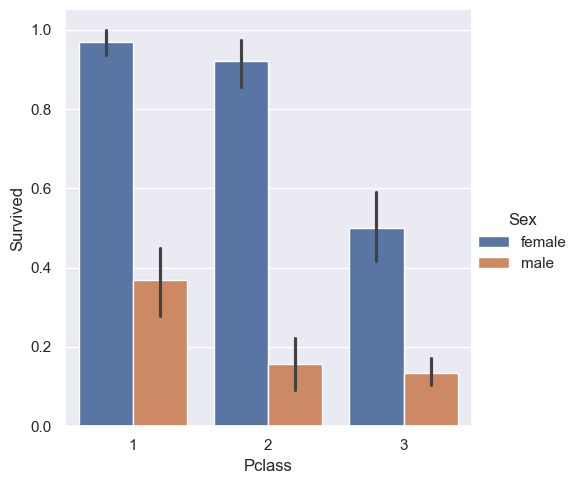

In [1397]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=train)

In [1398]:
train.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [1399]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [1400]:
train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_11388\3113762717.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Parch', y='Survived', ci=None, palette=default_colors, data=train)
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_11388\3113762717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', ci=None, palette=default_colors, data=train)
C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_11388\3113762717.py:2: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(x='Parch', y='Survived', ci=None, palette=default_colors, data=train)


<Axes: xlabel='Parch', ylabel='Survived'>

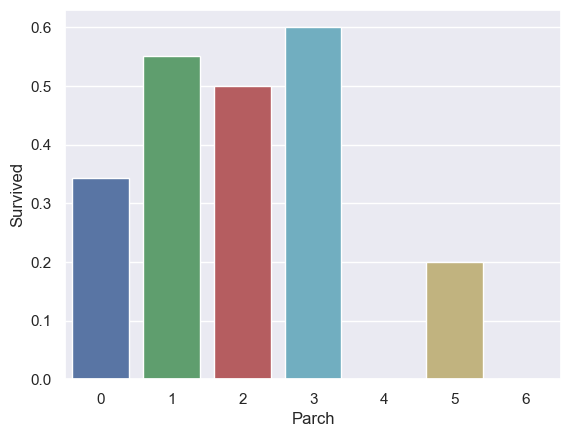

In [1401]:
default_colors=[ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
sns.barplot(x='Parch', y='Survived', ci=None, palette=default_colors, data=train)

<Axes: xlabel='Survived', ylabel='count'>

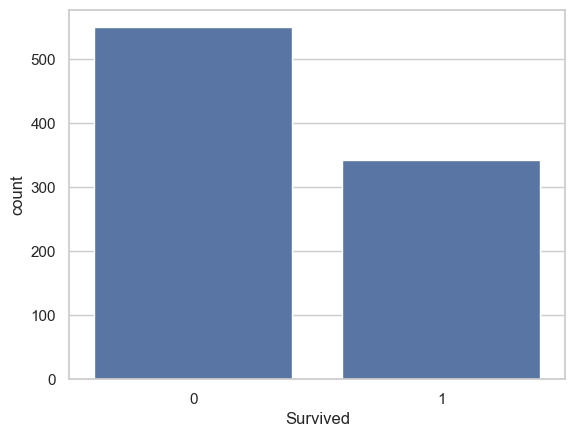

In [1402]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

In [1403]:
filtered_data = train[~train['Embarked'].isin(['C', 'S', 'Q'])]
filtered_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,NaN


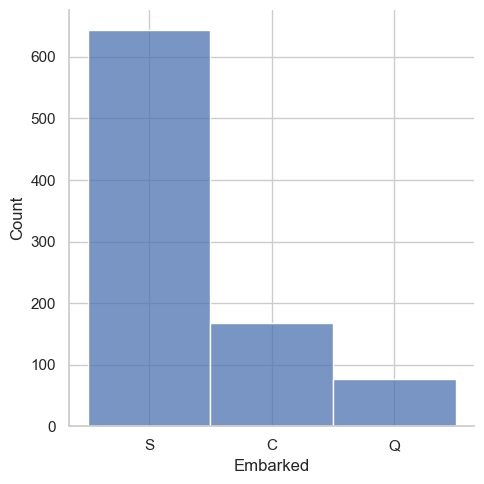

In [1404]:
sns.displot(data=train,x='Embarked')

In [1405]:
embarked_mode = train['Embarked'].mode()[0]
train['Embarked'].fillna(embarked_mode, inplace=True)

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_11388\2529969997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(embarked_mode, inplace=True)


<Axes: xlabel='Survived', ylabel='count'>

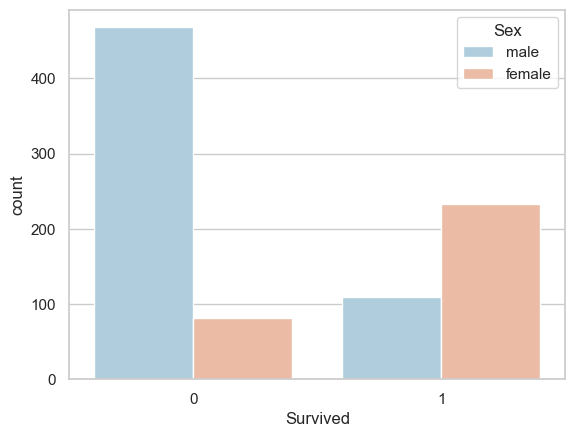

In [1406]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

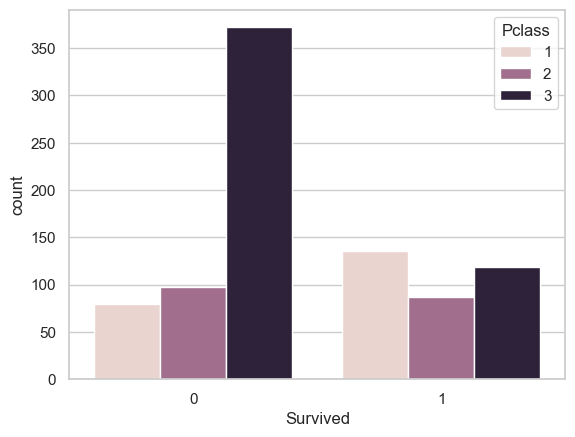

In [1407]:
sns.countplot(x='Survived',data=train,hue='Pclass')

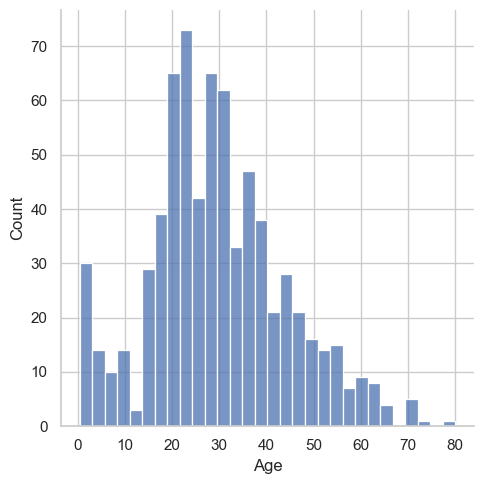

In [1408]:
sns.displot(train['Age'],kde=False,bins=30)

<Axes: ylabel='PassengerId'>

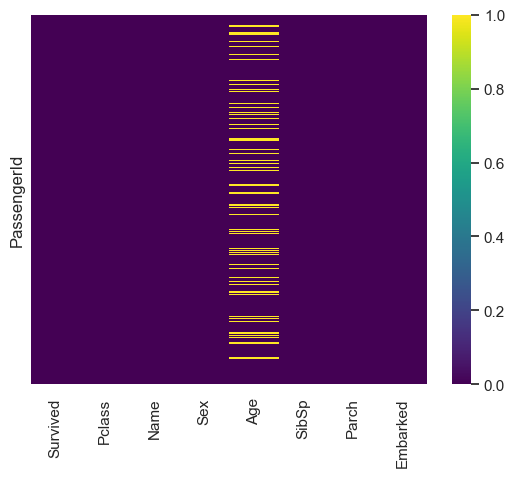

In [1409]:
sns.heatmap(train.isnull(),yticklabels=False,cmap=('viridis'))

<Axes: ylabel='PassengerId'>

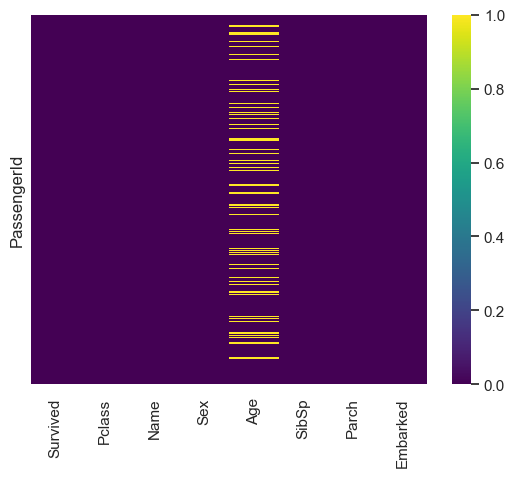

In [1410]:
sns.heatmap(train.isnull(),yticklabels=False,cmap=('viridis'))

## preprocessing the training data

In [1411]:
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [1412]:
train = train[['Pclass','Sex','Age','SibSp','Parch','Embarked','Survived']]
print(train.head())
print('\n\n',train.shape)

             Pclass     Sex   Age  SibSp  Parch Embarked  Survived
PassengerId                                                       
1                 3    male  22.0      1      0        S         0
2                 1  female  38.0      1      0        C         1
3                 3  female  26.0      0      0        S         1
4                 1  female  35.0      1      0        S         1
5                 3    male  35.0      0      0        S         0


 (891, 7)


In [1413]:
test = test[['Pclass','Sex','Age','SibSp','Parch','Embarked']]
print(test.head())
print('\n\n',test.shape)

             Pclass     Sex   Age  SibSp  Parch Embarked
PassengerId                                             
892               3    male  34.5      0      0        Q
893               3  female  47.0      1      0        S
894               2    male  62.0      0      0        Q
895               3    male  27.0      0      0        S
896               3  female  22.0      1      1        S


 (418, 6)


In [1414]:
train['Age'] = train['Age'].bfill() 
test['Age'] = test['Age'].ffill()
test['Age'] = test['Age'].bfill()

C:\Users\Bashir Rayaneh\AppData\Local\Temp\ipykernel_11388\3406099197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'] = train['Age'].bfill()


In [1415]:
test['Relatives_On_Board'] = test['SibSp'] + test['Parch']
train['Relatives_On_Board'] = train['SibSp'] + train['Parch']

In [1416]:
train = train.drop(['SibSp', 'Parch'], axis=1)
test = test.drop(['SibSp', 'Parch'], axis=1)

In [1417]:
train.head(10)

,Pclass,Sex,Age,Embarked,Survived,Relatives_On_Board
PassengerId,,,,,,
1,3,male,22.0,S,0,1
2,1,female,38.0,C,1,1
3,3,female,26.0,S,1,0
4,1,female,35.0,S,1,1
5,3,male,35.0,S,0,0
6,3,male,54.0,Q,0,0
7,1,male,54.0,S,0,0
8,3,male,2.0,S,0,4
9,3,female,27.0,S,1,2


In [1418]:
# Define a function to identify 'SensitivePeople'
def is_sensitive_person(row):
    if (row['Age'] < 20 or row['Age'] > 50) or row['Sex'] == 'female':
        return True
    else:
        return False

# Apply the function to each row in the DataFrame
test['SensitivePeople'] = test.apply(is_sensitive_person, axis=1)

test.head()

,Pclass,Sex,Age,Embarked,Relatives_On_Board,SensitivePeople
PassengerId,,,,,,
892,3,male,34.5,Q,0,False
893,3,female,47.0,S,1,True
894,2,male,62.0,Q,0,True
895,3,male,27.0,S,0,False
896,3,female,22.0,S,2,True


In [1419]:
# Define a function to identify 'SensitivePeople'
def is_sensitive_person(row):
    if (row['Age'] < 20 or row['Age'] > 50) or row['Sex'] == 'female':
        return True
    else:
        return False

# Apply the function to each row in the DataFrame
train['SensitivePeople'] = train.apply(is_sensitive_person, axis=1)

train.head()

,Pclass,Sex,Age,Embarked,Survived,Relatives_On_Board,SensitivePeople
PassengerId,,,,,,,
1,3,male,22.0,S,0,1,False
2,1,female,38.0,C,1,1,True
3,3,female,26.0,S,1,0,True
4,1,female,35.0,S,1,1,True
5,3,male,35.0,S,0,0,False


In [1420]:
new_order = ['Pclass', 'Sex', 'Age', 'Embarked', 'Relatives_On_Board','SensitivePeople', 'Survived']
new_order_2 = ['Pclass', 'Sex', 'Age', 'Embarked', 'Relatives_On_Board','SensitivePeople']
train = train.reindex(columns=new_order)
test = test.reindex(columns=new_order_2)
train.head()

,Pclass,Sex,Age,Embarked,Relatives_On_Board,SensitivePeople,Survived
PassengerId,,,,,,,
1,3,male,22.0,S,1,False,0
2,1,female,38.0,C,1,True,1
3,3,female,26.0,S,0,True,1
4,1,female,35.0,S,1,True,1
5,3,male,35.0,S,0,False,0


In [1421]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the specified columns
train[['Age', 'Relatives_On_Board']] = scaler.fit_transform(train[['Age', 'Relatives_On_Board']])
test[['Age', 'Relatives_On_Board']] = scaler.fit_transform(test[['Age', 'Relatives_On_Board']])

train.head()

,Pclass,Sex,Age,Embarked,Relatives_On_Board,SensitivePeople,Survived
PassengerId,,,,,,,
1,3,male,-0.539468,S,0.059160,False,0
2,1,female,0.557213,C,0.059160,True,1
3,3,female,-0.265298,S,-0.560975,True,1
4,1,female,0.351585,S,0.059160,True,1
5,3,male,0.351585,S,-0.560975,False,0


In [1422]:
encoded_train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked', 'SensitivePeople'])
encoded_test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked', 'SensitivePeople'])

In [1423]:
encoded_train.head()

,Age,Relatives_On_Board,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SensitivePeople_False,SensitivePeople_True
PassengerId,,,,,,,,,,,,,
1,-0.539468,0.059160,0,False,False,True,False,True,False,False,True,True,False
2,0.557213,0.059160,1,True,False,False,True,False,True,False,False,False,True
3,-0.265298,-0.560975,1,False,False,True,True,False,False,False,True,False,True
4,0.351585,0.059160,1,True,False,False,True,False,False,False,True,False,True
5,0.351585,-0.560975,0,False,False,True,False,True,False,False,True,True,False


In [1424]:
new_order = ['Survived','Age','Relatives_On_Board', 'Pclass_1', 'Pclass_2', 'Pclass_3',
             'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
             'SensitivePeople_False', 'SensitivePeople_True']
new_order_2 = ['Age','Relatives_On_Board', 'Pclass_1', 'Pclass_2', 'Pclass_3',
             'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
             'SensitivePeople_False', 'SensitivePeople_True']
encoded_train = encoded_train.reindex(columns=new_order)
encoded_test = encoded_test.reindex(columns=new_order_2)

In [1425]:
encoded_train.shape

(891, 13)

In [1426]:
encoded_train.head()

,Survived,Age,Relatives_On_Board,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SensitivePeople_False,SensitivePeople_True
PassengerId,,,,,,,,,,,,,
1,0,-0.539468,0.059160,False,False,True,False,True,False,False,True,True,False
2,1,0.557213,0.059160,True,False,False,True,False,True,False,False,False,True
3,1,-0.265298,-0.560975,False,False,True,True,False,False,False,True,False,True
4,1,0.351585,0.059160,True,False,False,True,False,False,False,True,False,True
5,0,0.351585,-0.560975,False,False,True,False,True,False,False,True,True,False


In [1427]:
encoded_test.head()

,Age,Relatives_On_Board,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,SensitivePeople_False,SensitivePeople_True
PassengerId,,,,,,,,,,,,
892,0.314998,-0.553443,False,False,True,False,True,False,True,False,True,False
893,1.214994,0.105643,False,False,True,True,False,False,False,True,False,True
894,2.294989,-0.553443,False,True,False,False,True,False,True,False,False,True
895,-0.224999,-0.553443,False,False,True,False,True,False,False,True,True,False
896,-0.584997,0.764728,False,False,True,True,False,False,False,True,False,True


In [1428]:
encoded_test.shape

(418, 12)

In [1429]:
X = encoded_train.iloc[:, 1:]
y = encoded_train.iloc[:, 0]

In [1430]:
X.shape

(891, 12)

In [1431]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=6)
selected_features = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_indices]
print('Selected Features:')
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
Pclass_1
Pclass_3
Sex_female
Sex_male
SensitivePeople_False
SensitivePeople_True


In [1432]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
rfe = RFE(estimator, n_features_to_select=6)
selected_features = rfe.fit_transform(X, y)
selected_indices = rfe.get_support(indices=True)
seleted_feature_names = [X.columns[i] for i in selected_indices]
print('Selected Features:')
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
Pclass_1
Pclass_3
Sex_female
Sex_male
SensitivePeople_False
SensitivePeople_True


In [1433]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
feature_importances = lasso.coef_
selected_indices = np.nonzero(feature_importances)[0]
selected_feature_names = X.columns[selected_indices]
print('Selected Features:')
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
Sex_female
Sex_male


In [1434]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
rfa = RFECV(estimator, cv=10)
selected_features = rfa.fit_transform(X, y)
selected_indices = rfa.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_indices]
print('Selected Features:')
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
Age
Relatives_On_Board
Pclass_1
Pclass_3
Sex_female
Sex_male
Embarked_S


In [1435]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
selector = SelectFromModel(estimator)
selected_features = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_feature_names = [X.columns[i] for i in selected_indices]
print('Selected Features:')
for feature_name in selected_feature_names:
    print(feature_name)

Selected Features:
Age
Relatives_On_Board
Sex_female
Sex_male


In [1436]:
X = encoded_train.iloc[:, 1:].values
y = encoded_train.iloc[:, 0].values

In [1437]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1438]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [1439]:
X_train.shape

(712, 12)

In [1440]:
print(type(X_train), X_train.dtype)
print(type(y_train), y_train.dtype)

<class 'numpy.ndarray'> float32
<class 'numpy.ndarray'> int32


In [1441]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16 , activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [1442]:
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [1443]:
ann.fit(X_train, y_train, batch_size = 16, epochs = 200)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.4799 - loss: 0.7056 
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7053 - loss: 0.6007
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.7589 - loss: 0.5661
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.7695 - loss: 0.5432
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.7885 - loss: 0.5219
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.8115 - loss: 0.4848 
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.8059 - loss: 0.4684
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.7922 - loss: 0.4767
Epoch 9/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8026 - loss: 0.4588
Epoch 10/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.8057 - loss: 0.4541
Epoch 11/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.4264
Epoch 12/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0

In [1444]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [1445]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8212290502793296

## implenting RandomizedSearch

In [1446]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

# Custom KerasClassifier that includes neuron parameters
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, optimizer='adam', init_mode='uniform', activation='relu', learning_rate=0.001, 
                 neurons1=16, neurons2=8, epochs=100, batch_size=10, verbose=0):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.init_mode = init_mode
        self.activation = activation
        self.learning_rate = learning_rate
        self.neurons1 = neurons1  # First hidden layer neurons
        self.neurons2 = neurons2  # Second hidden layer neurons
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        # Pass the neuron parameters to the model-building function
        self.model = self.build_fn(optimizer=self.optimizer, init_mode=self.init_mode, activation=self.activation, 
                                   learning_rate=self.learning_rate, neurons1=self.neurons1, neurons2=self.neurons2)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")  # Binary classification

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]


In [1447]:
def create_model(optimizer='adam', init_mode='uniform', activation='relu', learning_rate=0.001, neurons1=16, neurons2=8):
    model = Sequential()
    model.add(Dense(neurons1, input_dim=12, kernel_initializer=init_mode, activation=activation))  # First hidden layer with 16 neurons
    model.add(Dense(neurons2, kernel_initializer=init_mode, activation=activation))                # Second hidden layer with 8 neurons
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))  # Output layer for binary classification

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [1448]:
# Hyperparameter grid to include number of neurons and other hyperparameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'init_mode': ['uniform', 'glorot_uniform', 'he_normal'],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [50, 100, 200],
    'batch_size': [10, 20, 50],
    'neurons1': [4, 8, 16, 32, 64],  # First hidden layer neurons
    'neurons2': [2, 4, 8, 16, 32],   # Second hidden layer neurons
}


In [1449]:
from sklearn.model_selection import RandomizedSearchCV

# Create the KerasClassifier instance
model = KerasClassifier(build_fn=create_model, verbose=0)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                                   n_iter=50, cv=5, verbose=2, n_jobs=-1)

# Fit the model (replace X_train and y_train with your actual training data)
random_search_result = random_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f"Best Score: {random_search_result.best_score_}")
print(f"Best Hyperparameters: {random_search_result.best_params_}")

# Evaluate the best model on test data (replace X_test and y_test with your actual test data)
best_model = random_search_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Bashir Rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\Bashir Rayaneh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Score: 0.8272333264350891
Best Hyperparameters: {'optimizer': 'adam', 'neurons2': 2, 'neurons1': 32, 'learning_rate': 0.1, 'init_mode': 'he_normal', 'epochs': 100, 'batch_size': 50, 'activation': 'tanh'}
Test Accuracy: 0.8156424760818481
